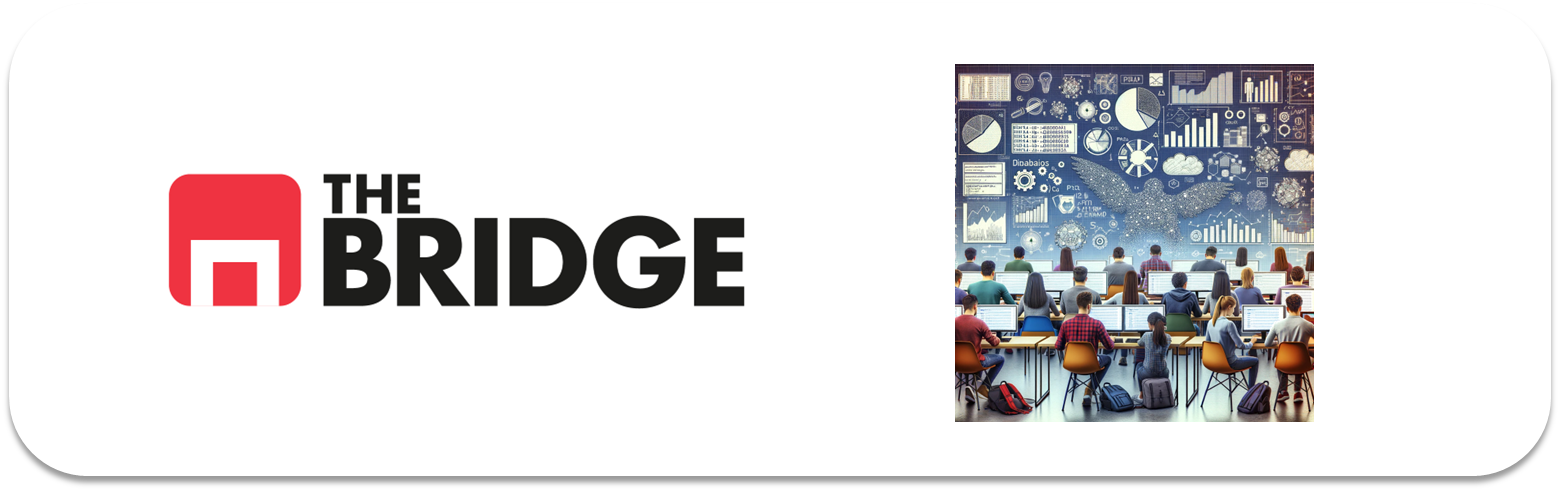

## PRACTICA OBLIGATORIA: **Regresion Lineal y Regularización**

* La práctica obligatoria de esta unidad consiste en hacer un modelado completo de un problema que ya conoces, la predicción de casas, pero con otro dataset. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Modelo de Regresión Lineal

El objetivo del modelo que tienes que construir es predecir la mediana del precio de las casas en una zona del área metropolitana de Boston dadas las características de las mismas. Sí, es parecido pero no igual a lo que hemos venido haciendo.

Aquí tienes una descripción de las variables del dataset, del que tendrás que decidir el target:  

***CRIM:*** Tasa de criminalidad per cápita por ciudad  
***ZN:*** Proporción de terreno residencial destinado a lotes de más de 25,000 pies cuadrados  
***INDUS:*** Proporción de acres de negocios no minoristas por ciudad  
***CHAS:*** Variable ficticia del río Charles (= 1 si el sector limita con el río; 0 en caso contrario)  
***NOX:*** Concentración de óxidos de nitrógeno (partes por 10 millones)  
***RM:*** Número promedio de habitaciones por vivienda  
***AGE:*** Proporción de unidades ocupadas por el propietario construidas antes de 1940  
***DIS:*** Distancias ponderadas a cinco centros de empleo de Boston  
***RAD:*** Índice de accesibilidad a autopistas radiales  
***TAX:*** Tasa de impuesto sobre la propiedad de valor total por $10,000  
***PTRATIO:*** Relación alumno-maestro por ciudad  
***LSTAT:*** % de población de estatus socioeconómico bajo  
***MEDV:*** Valor medio de las viviendas ocupadas por sus propietarios en miles de dólares  

### Indicaciones

A continuación tienes las indicaciones para hacer el modelado. No necesariamente tienes que seguirlos al pie de la letra, porque a partir de ahora ya las práctica obligatorias dejarán de ser mayormente guiadas por ejercicios y serán más de libre desarrollo, aunque con objetivos específicos, claros y determinados. 

En concreto se pide hacer un modelo de regresión lineal, evaluarlo contra un dataset de test reservado del original mostrando MAE,RMSE,MSE y $R2$, comparar las predicciones con los valores reales y realizar al menos un tipo de regularización de las conocidas, testando por lo menos 3 valores diferentes de hiperparámetros.

Los pasos para guiar el trabajo:
1. Carga el dataset. Está limpio y no necesitarás completar nulos, ni repasar los valores de las columnas.
2. Escoge y analiza la variable target de forma gráfica para ver la idoneidad de hacer un modelo de regresión.
3. Haz el split en train y test que creas conveniente y de la forma que creas conveniente.
4. Construye las parejas X,y de train y test
5. Haz un mini-EDA, selecciona las features que quieres quedarte y por qué.
6. Trata las variables para que funcionen lo mejor posible en el modelo.
7. Construye un modelo de regresión lineal.
8. Analiza si lo crees conveniente los pesos y la importancia de las features.
8. Evalúa tu modelo. Haz un pequeño assesmente de su generabilidad. Compara gráficamente las predicciones con los valores reales.
9. Regulariza al menos con un modelo alternativo y juega con 3 posibles valores de los hiperparámetros del modelo de regularización.
10. Expresa tus conclusiones, en concreto ¿con qué modelo te quedarías?¿por qué?



In [275]:
# IMPORTS
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn import linear_model, metrics, model_selection
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [276]:
# 1. Carga el dataset. Está limpio y no necesitarás completar nulos, ni repasar los valores de las columnas.
df = pd.read_csv("./data/hard_to_find/obligatoria_hard.csv",sep="|")
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,6.48,22.0


<Axes: xlabel='MEDV', ylabel='Count'>

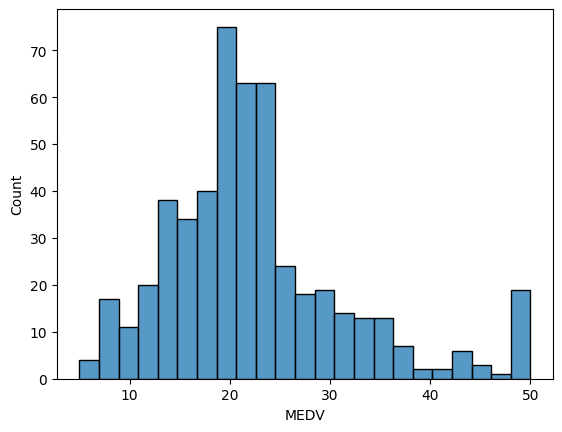

In [277]:
#2. Escoge y analiza la variable target de forma gráfica para ver la idoneidad de hacer un modelo de regresión.
sns.histplot(df["MEDV"])

In [278]:
#3. Haz el split en train y test que creas conveniente y de la forma que creas conveniente.

# Feautures
X = df[['CRIM', 'ZN', 'INDUS','CHAS','NOX','RM','AGE','DIS',
       'RAD','TAX','PTRATIO','LSTAT']]

# Target
y = df['MEDV']

#4. Construye las parejas X,y de train y test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [279]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)


(404, 12)
(404,)
(102, 12)
(102,)


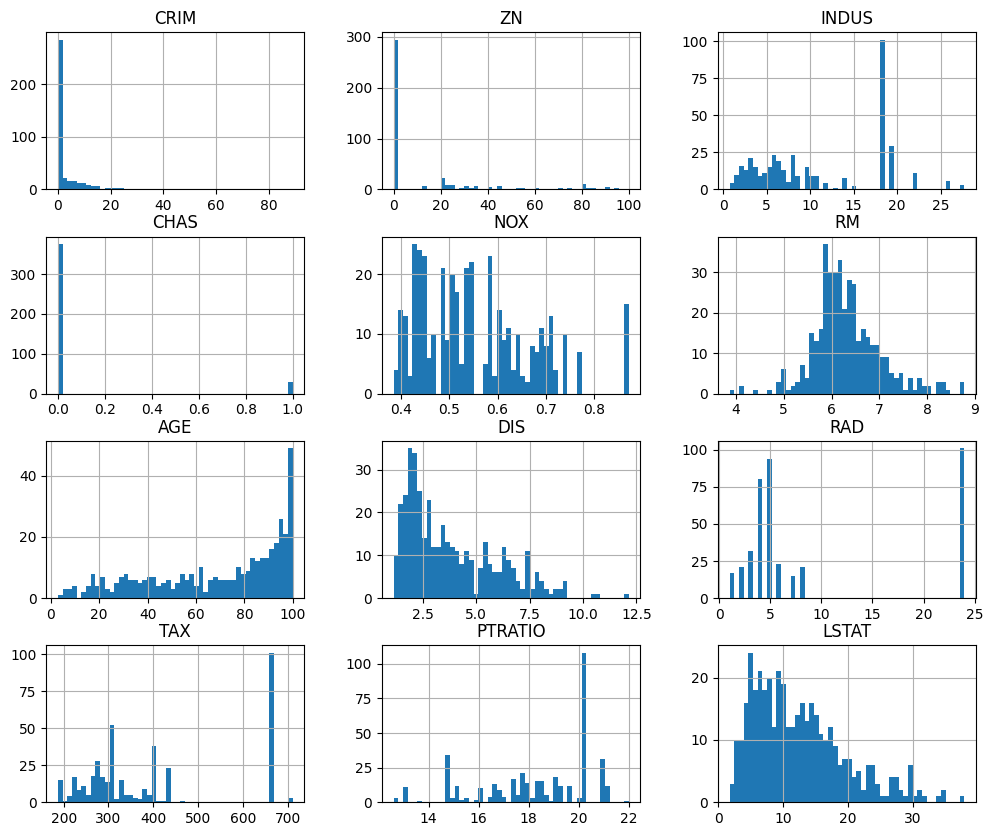

In [280]:
#5. Haz un mini-EDA, selecciona las features que quieres quedarte y por qué.
X_train.hist(bins=50, figsize=(12, 10)) # La forma de generar histogramas de una sola vez para las variables numéricas de un dataset
plt.show()

In [281]:
# Combina X_train y y_train
df_train = pd.concat([X_train, y_train], axis=1)

# Asegúrate de que la variable objetivo tenga un nombre, por ejemplo 'MEDV'
df_train.rename(columns={y_train.name: 'MEDV'}, inplace=True)

corr_matrix = df_train.corr(numeric_only= True)
corr_matrix["MEDV"].sort_values(ascending = False)
corr_matrix

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
CRIM,1.000000,-0.198855,0.400198,-0.044589,0.396406,-0.200303,0.334090,-0.366487,0.615947,0.576894,0.288970,0.414142,-0.380091
ZN,-0.198855,1.000000,-0.533489,-0.043754,-0.526414,0.274661,-0.575078,0.681817,-0.313790,-0.294267,-0.389163,-0.396572,0.309504
INDUS,0.400198,-0.533489,1.000000,0.095158,0.770957,-0.398690,0.636569,-0.707566,0.588952,0.702353,0.348303,0.603644,-0.470546
CHAS,-0.044589,-0.043754,0.095158,1.000000,0.135476,0.111272,0.096016,-0.121671,0.028685,0.007746,-0.113003,-0.070652,0.190642
NOX,0.396406,-0.526414,0.770957,0.135476,1.000000,-0.299615,0.720417,-0.772330,0.589061,0.650247,0.161253,0.593862,-0.415768
RM,-0.200303,0.274661,-0.398690,0.111272,-0.299615,1.000000,-0.210863,0.198299,-0.199738,-0.281127,-0.342643,-0.612577,0.710680
AGE,0.334090,-0.575078,0.636569,0.096016,0.720417,-0.210863,1.000000,-0.756589,0.430321,0.471670,0.240841,0.571051,-0.340216
DIS,-0.366487,0.681817,-0.707566,-0.121671,-0.772330,0.198299,-0.756589,1.000000,-0.483329,-0.523577,-0.217588,-0.494921,0.235114
RAD,0.615947,-0.313790,0.588952,0.028685,0.589061,-0.199738,0.430321,-0.483329,1.000000,0.912527,0.472257,0.480301,-0.387467
TAX,0.576894,-0.294267,0.702353,0.007746,0.650247,-0.281127,0.471670,-0.523577,0.912527,1.000000,0.444836,0.530632,-0.459795


In [282]:
columnas = corr_matrix["MEDV"][corr_matrix["MEDV"] > 0.07].index.to_list()
columnas

['ZN', 'CHAS', 'RM', 'DIS', 'MEDV']

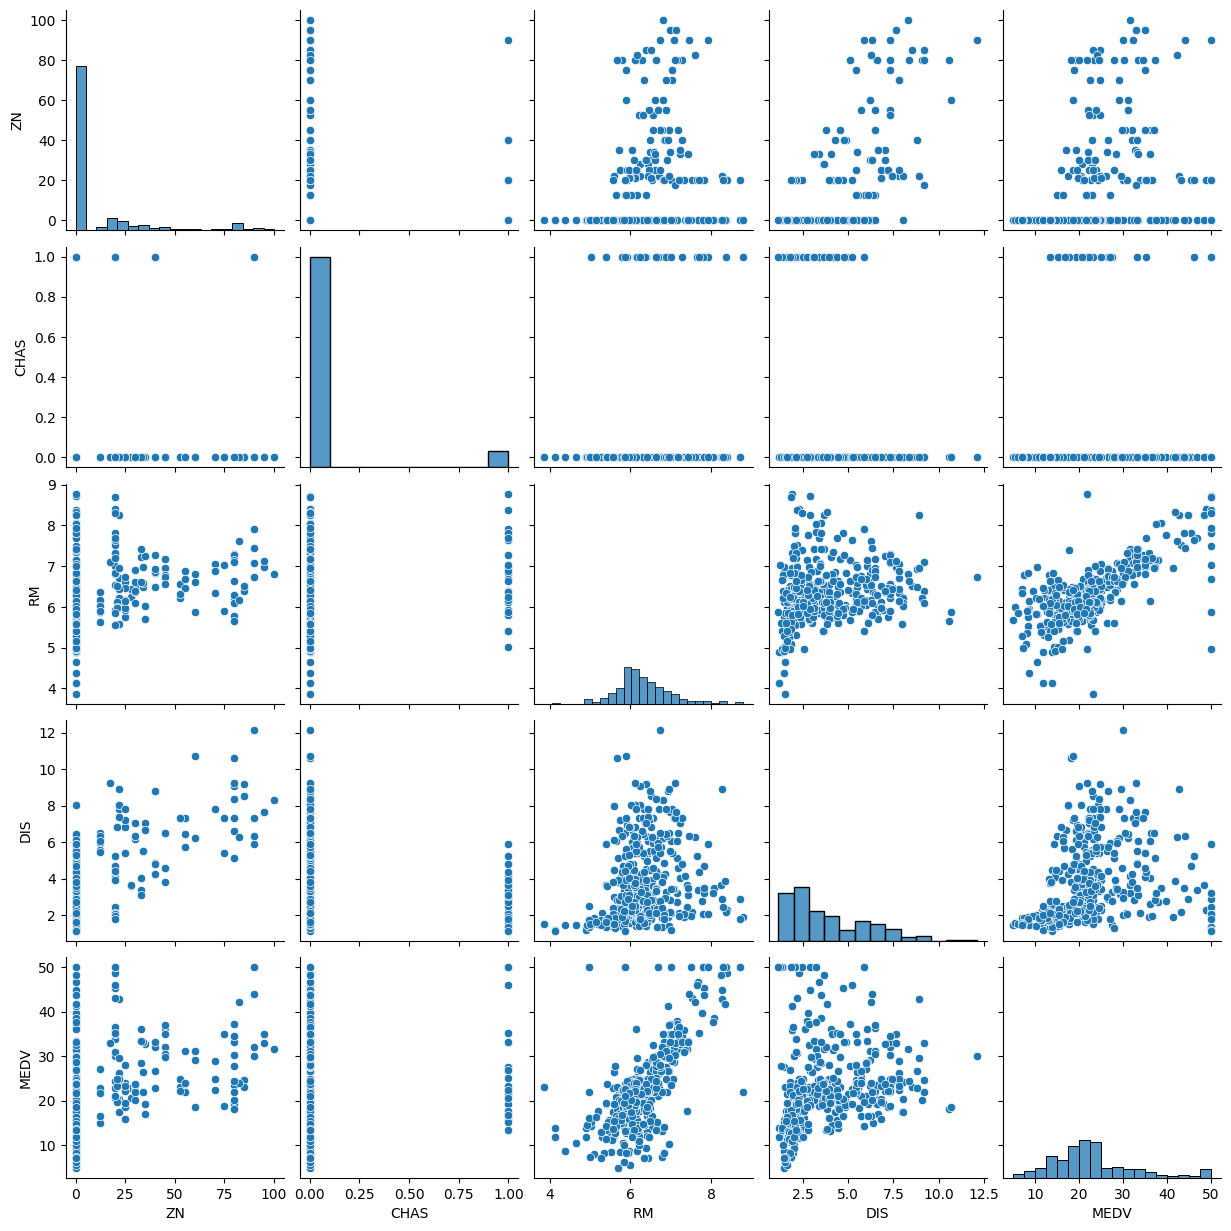

In [283]:

sns.pairplot(df_train[columnas]);

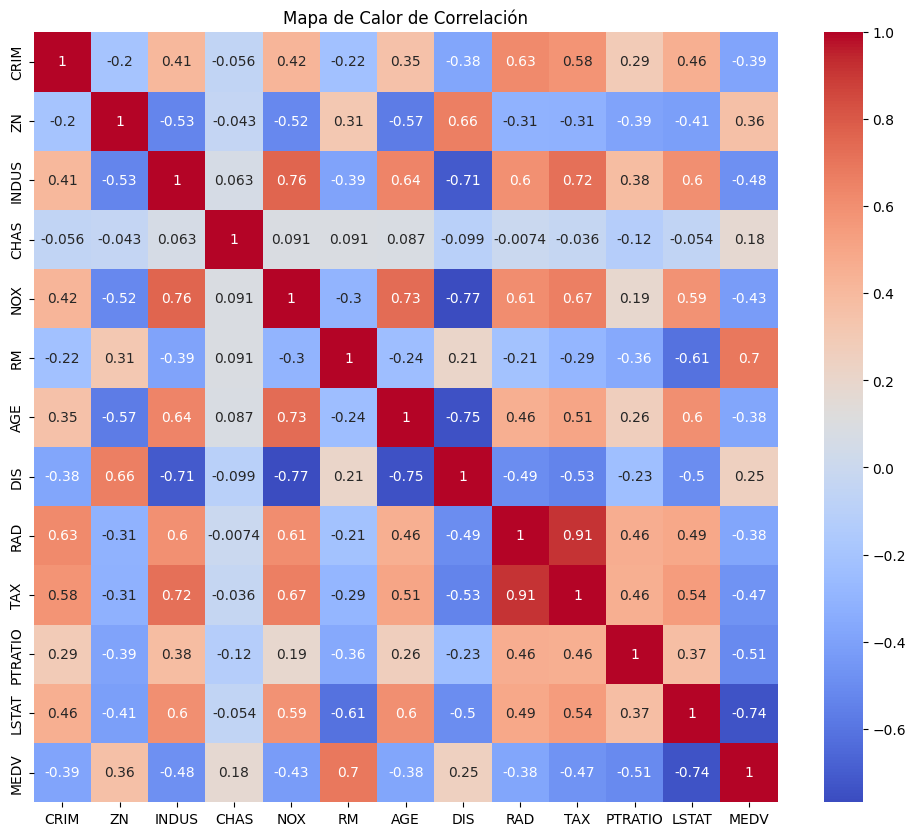

In [284]:
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Mapa de Calor de Correlación')
plt.show()

In [285]:
#'DIS','ZN',,'PTRATIO'
features_selected = ['ZN','RM','DIS','CHAS','LSTAT','PTRATIO','TAX']
X_train_selected = df_train[features_selected]

***PTRATIO:*** Relación alumno-maestro por ciudad  
***LSTAT:*** % de población de estatus socioeconómico bajo  
***DIS:*** Distancias ponderadas a cinco centros de empleo de Boston  
***RM:*** Número promedio de habitaciones por vivienda  

array([[<Axes: title={'center': 'ZN'}>, <Axes: title={'center': 'RM'}>,
        <Axes: title={'center': 'DIS'}>],
       [<Axes: title={'center': 'CHAS'}>,
        <Axes: title={'center': 'LSTAT'}>,
        <Axes: title={'center': 'PTRATIO'}>],
       [<Axes: title={'center': 'TAX'}>, <Axes: >, <Axes: >]],
      dtype=object)

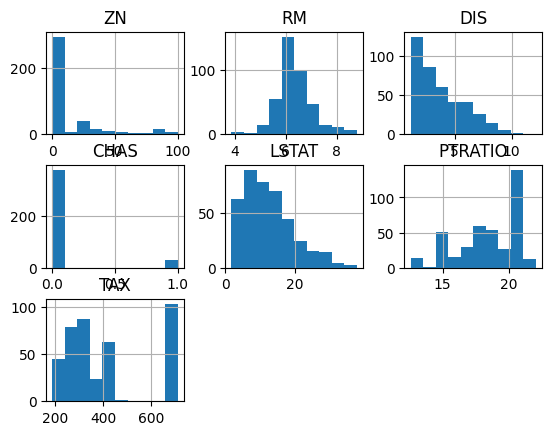

In [286]:
#6. Trata las variables para que funcionen lo mejor posible en el modelo.
X_train_selected.hist()

In [287]:
X_train_selected.describe()

,ZN,RM,DIS,CHAS,LSTAT,PTRATIO,TAX
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,11.569307,6.315891,3.808195,0.071782,12.457351,18.318317,404.032178
std,23.152481,0.709452,2.131226,0.258447,7.110381,2.228701,166.172655
min,0.000000,3.863000,1.129600,0.000000,1.730000,12.600000,187.000000
25%,0.000000,5.890500,2.087875,0.000000,6.772500,16.800000,279.000000
50%,0.000000,6.210000,3.175750,0.000000,10.925000,18.700000,330.000000
75%,20.000000,6.636750,5.400800,0.000000,16.372500,20.200000,666.000000
max,100.000000,8.780000,12.126500,1.000000,37.970000,22.000000,711.000000


In [288]:
# # Crear bins para categorizar ZN
# bins = [0, 30, 60, 100]  # Puedes ajustar estos valores según tus necesidades
# labels = ['Bajo', 'Medio', 'Alto']
# df['ZN_categoria'] = pd.cut(df['ZN'], bins=bins, labels=labels)

# # Codificación One-Hot para convertir las categorías en variables binarias
# df_encoded = pd.get_dummies(df, columns=['ZN_categoria'], drop_first=True)

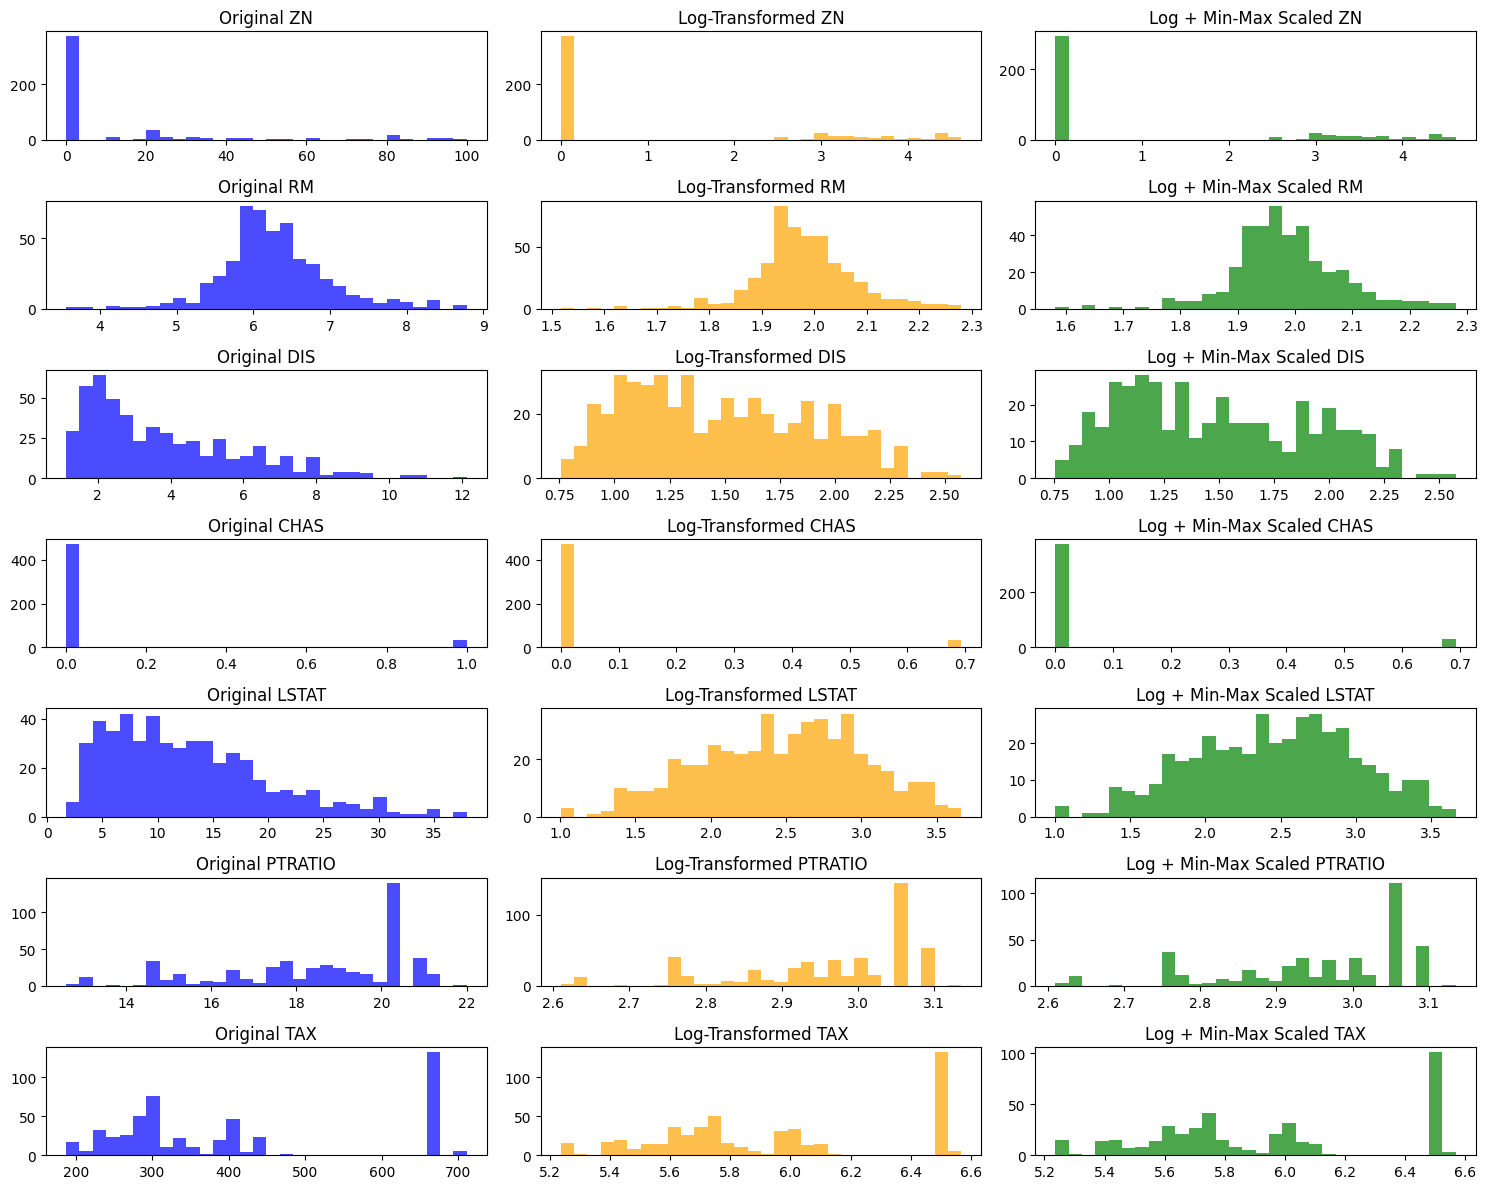

In [289]:
df_transformed = X_train_selected.copy()

# 1. Aplicar transformación logarítmica
df_transformed[features_selected] = np.log1p(df_transformed[features_selected])

# # 2. Aplicar Min-Max Scaling
# scaler = MinMaxScaler()
# df_transformed[features_selected] = scaler.fit_transform(df_transformed[features_selected])


# 3. Visualizar histogramas antes y después de las transformaciones
fig, axes = plt.subplots(len(features_selected), 3, figsize=(15, 12))

for i, column in enumerate(features_selected):
    # Histograma de la columna original
    axes[i, 0].hist(df[column], bins=30, alpha=0.7, color='blue')
    axes[i, 0].set_title(f'Original {column}')
    
    # Histograma de la columna logarítmica
    log_transformed = np.log1p(df[column])
    axes[i, 1].hist(log_transformed, bins=30, alpha=0.7, color='orange')
    axes[i, 1].set_title(f'Log-Transformed {column}')
    
    # Histograma de la columna escalada con Min-Max Scaling
    axes[i, 2].hist(df_transformed[column], bins=30, alpha=0.7, color='green')
    axes[i, 2].set_title(f'Log + Min-Max Scaled {column}')

plt.tight_layout()
plt.show()

In [290]:
# # # 1. Aplicar transformación logarítmica
# #X_train_selected[features_selected] = np.log1p(X_train_selected[features_selected])

# # # 2. Aplicar Min-Max Scaling
# # scaler = MinMaxScaler()
# # X_train_selected[features_selected] = scaler.fit_transform(X_train_selected[features_selected])

# # 2. Aplicar Standard Scaler
# scaler = StandardScaler()
# X_train_selected[features_selected] = scaler.fit_transform(X_train_selected[features_selected])



In [291]:
X_train_selected.describe()

,ZN,RM,DIS,CHAS,LSTAT,PTRATIO,TAX
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,11.569307,6.315891,3.808195,0.071782,12.457351,18.318317,404.032178
std,23.152481,0.709452,2.131226,0.258447,7.110381,2.228701,166.172655
min,0.000000,3.863000,1.129600,0.000000,1.730000,12.600000,187.000000
25%,0.000000,5.890500,2.087875,0.000000,6.772500,16.800000,279.000000
50%,0.000000,6.210000,3.175750,0.000000,10.925000,18.700000,330.000000
75%,20.000000,6.636750,5.400800,0.000000,16.372500,20.200000,666.000000
max,100.000000,8.780000,12.126500,1.000000,37.970000,22.000000,711.000000


In [292]:
#7. Construye un modelo de regresión lineal.
from sklearn.linear_model import LinearRegression

lin_reg = linear_model.LinearRegression()
lin_reg.fit(X_train_selected,y_train)

LinearRegression()

In [293]:
# 8. Analiza si lo crees conveniente los pesos y la importancia de las features.
print(lin_reg.intercept_)
lin_reg.coef_

19.121872822458183


array([ 0.03214152,  4.56828174, -0.93233208,  2.92052592, -0.61002209,
       -0.62718637, -0.00772425])

In [294]:
coef_df = pd.DataFrame(lin_reg.coef_, X_train_selected.columns, 
                      columns=['Coefficient'])
coef_df

,Coefficient
ZN,0.032142
RM,4.568282
DIS,-0.932332
CHAS,2.920526
LSTAT,-0.610022
PTRATIO,-0.627186
TAX,-0.007724


In [295]:
#8. Evalúa tu modelo. Haz un pequeño assesmente de su generabilidad. Compara gráficamente las predicciones con los valores reales.
X_test = X_test[features_selected]
predictions = lin_reg.predict(X_test)
predictions

array([ 2.77524675e+01,  3.52450136e+01,  1.55907281e+01,  2.41337866e+01,
        1.73317995e+01,  2.19235180e+01,  1.73405628e+01,  1.44136376e+01,
        1.90236255e+01,  2.05219794e+01,  2.31851118e+01,  1.84387278e+01,
       -2.15218505e+00,  2.05862903e+01,  1.91246209e+01,  2.37206047e+01,
        1.99526569e+01,  3.44075635e+00,  3.95892966e+01,  1.63949195e+01,
        2.67332634e+01,  2.87725038e+01,  1.19451479e+01,  2.57511292e+01,
        1.74203633e+01,  1.27692435e+01,  2.14042049e+01,  1.83030518e+01,
        2.13142488e+01,  1.92300699e+01,  2.04970160e+01,  2.53426199e+01,
        2.52902784e+01,  1.76261075e+01,  1.33576808e+01,  2.17240719e+01,
        3.18224162e+01,  2.06783835e+01,  2.30439103e+01,  2.37238327e+01,
        1.31776610e+01,  3.06548931e+01,  4.13984830e+01,  1.65164393e+01,
        2.69297276e+01,  1.51733375e+01,  1.48985560e+01,  2.50097952e+01,
        1.67155572e+01,  3.10033959e+01,  2.11386279e+01,  3.28931727e+01,
        1.65105967e+01,  

In [296]:
slope = lin_reg.coef_[0]
intercept = lin_reg.intercept_

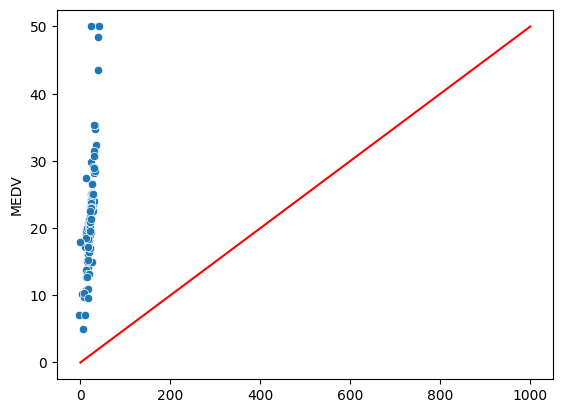

In [297]:
sns.scatterplot(x=predictions,y=y_test);
plt.plot([0,1000],[0,50],'red')
plt.show()

In [298]:
from sklearn.metrics import mean_squared_error
mse_lin = mean_squared_error(y_test, predictions)
rmse_lin = np.sqrt(mse_lin) # En realidad damos la raíz cuadrada del error cuadrático medio
# que está en las mismas unidades que el target
print(rmse_lin)

5.0273700785274755


In [299]:
from sklearn.model_selection import cross_val_score

lin_rmses = -cross_val_score(lin_reg, X_train_selected, y_train,
                              scoring="neg_root_mean_squared_error", cv=10) # k = 10
pd.Series(lin_rmses).describe()

count    10.000000
mean      5.080972
std       0.869970
min       3.888048
25%       4.492835
50%       4.793835
75%       5.514465
max       6.706542
dtype: float64

In [300]:
#9. Regulariza al menos con un modelo alternativo y juega con 3 posibles valores de los hiperparámetros del modelo de regularización.
X_train_selected

,ZN,RM,DIS,CHAS,LSTAT,PTRATIO,TAX
477,0.0,5.304,2.1007,0.0,24.91,20.2,666.0
15,0.0,5.834,4.4986,0.0,8.47,21.0,307.0
332,35.0,6.031,6.6407,0.0,7.83,16.9,304.0
423,0.0,6.103,2.0218,0.0,23.29,20.2,666.0
19,0.0,5.727,3.7965,0.0,11.28,21.0,307.0
...,...,...,...,...,...,...,...
106,0.0,5.836,2.2110,0.0,18.66,20.9,384.0
270,20.0,5.856,4.4290,0.0,13.00,18.6,223.0
348,80.0,6.635,8.3440,0.0,5.99,17.0,280.0
435,0.0,6.629,2.1247,0.0,23.27,20.2,666.0


In [301]:
from sklearn.linear_model import Ridge

ridgeR = Ridge(alpha = 1) # alpha es lambda 
ridgeR.fit(X_train_selected, y_train)

STR = round(np.sqrt(metrics.mean_squared_error(y_train, lin_reg.predict(X_train_selected))),2)
STtR = round(np.sqrt(metrics.mean_squared_error(y_test, lin_reg.predict(X_test))),2)
RTR = round(np.sqrt(metrics.mean_squared_error(y_train, ridgeR.predict(X_train_selected))),2)
RTtR = round(metrics.mean_squared_error(y_test, ridgeR.predict(X_test)),2)           
print(f"Train MSE sin regularización:{STR}")
print(f"Test MSE sin regularización:{STtR}") 
print(f"Train MSE:{RTR}")    
print(f"Test MSE:{RTtR}")    
# print("Test RMSE:", np.sqrt(metrics.mean_squared_error(y_test, ridgeR.predict(X_test))))

Train MSE sin regularización:4.97
Test MSE sin regularización:5.03
Train MSE:4.97
Test MSE:25.22


Train RMSE: 5.3158
Test RMSE: 4.9787


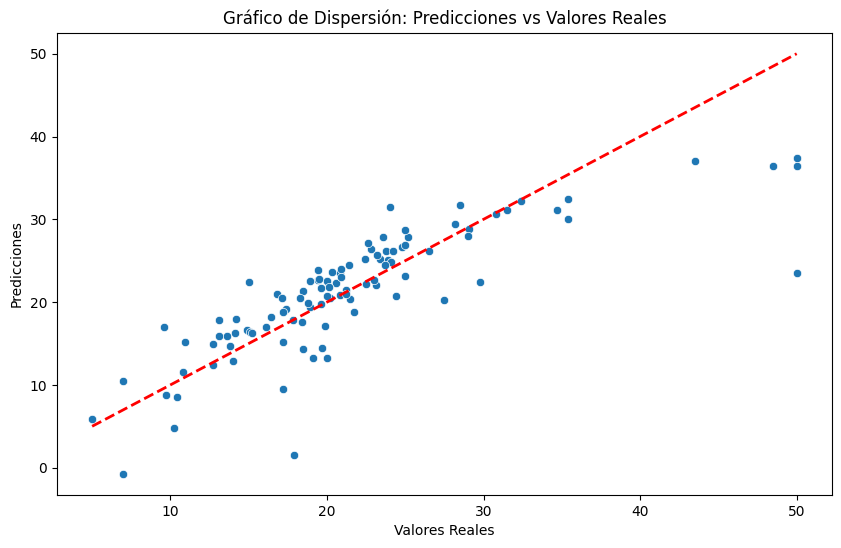

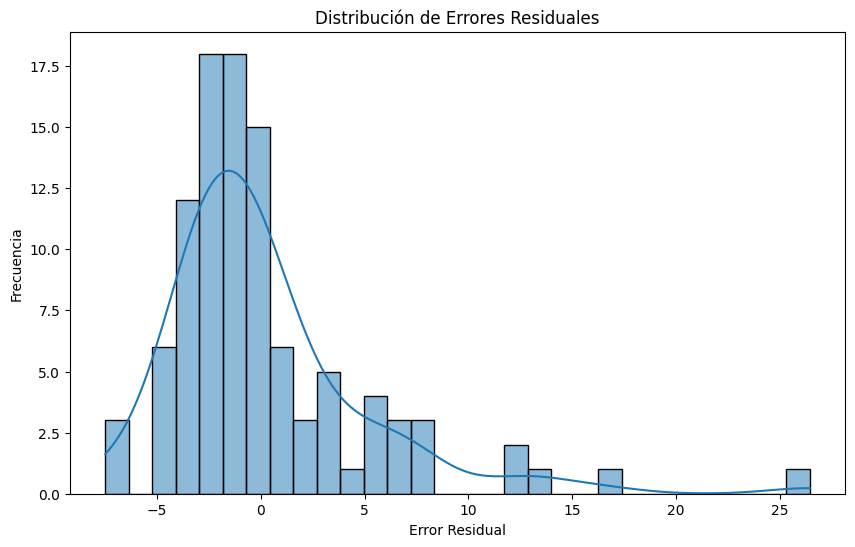

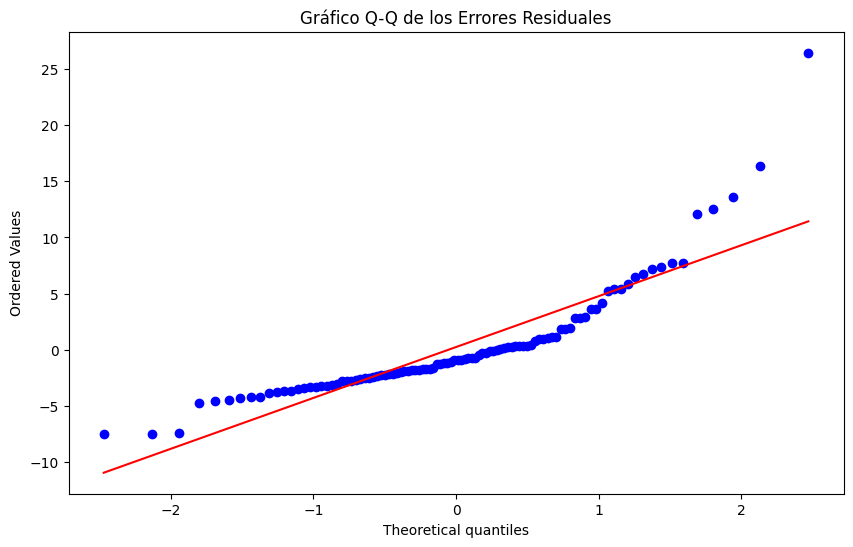

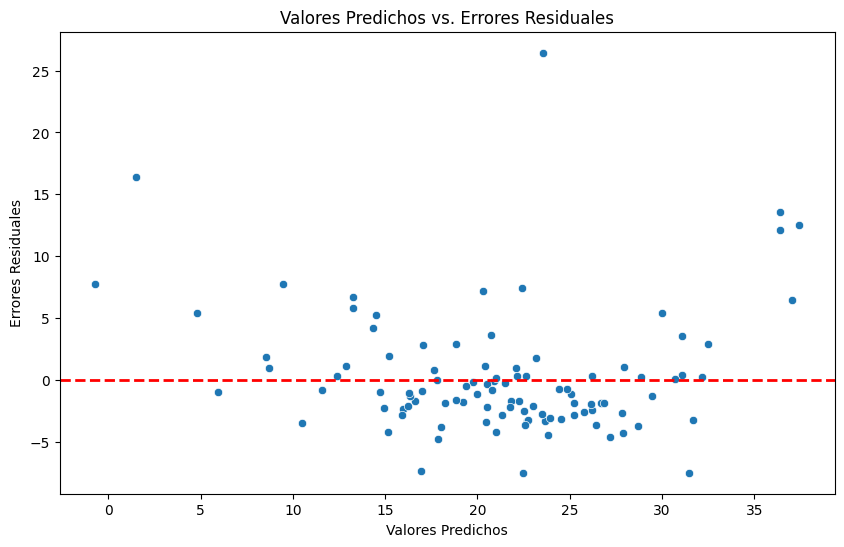

In [302]:
from sklearn.linear_model import Lasso
from sklearn import metrics
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Entrenar el modelo Lasso con alpha = 1
lassoR = Lasso(alpha=1)
lassoR.fit(X_train_selected, y_train)

# Calcular el MSE y RMSE en el conjunto de entrenamiento
train_mse = metrics.mean_squared_error(y_train, lassoR.predict(X_train_selected))
train_rmse = np.sqrt(train_mse)

# Calcular el MSE y RMSE en el conjunto de prueba
test_mse = metrics.mean_squared_error(y_test, lassoR.predict(X_test))
test_rmse = np.sqrt(test_mse)

# Imprimir los resultados
print("Train RMSE: %0.4f" % train_rmse)
print("Test RMSE: %0.4f" % test_rmse)

# Predicciones en el conjunto de prueba
predictions = lassoR.predict(X_test)

# Visualización 1: Gráfico de dispersión Predicciones vs Valores Reales
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=predictions, alpha=1)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)  # Línea de identidad
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.title('Gráfico de Dispersión: Predicciones vs Valores Reales')
plt.show()

# Visualización 2: Histograma de Errores Residuales
residuals = y_test - predictions
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True, bins=30)
plt.xlabel('Error Residual')
plt.ylabel('Frecuencia')
plt.title('Distribución de Errores Residuales')
plt.show()

# Visualización 3: Gráfico Q-Q de los Errores Residuales
import scipy.stats as stats
plt.figure(figsize=(10, 6))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('Gráfico Q-Q de los Errores Residuales')
plt.show()

# Visualización 4: Valores Predichos vs. Errores Residuales
plt.figure(figsize=(10, 6))
sns.scatterplot(x=predictions, y=residuals, alpha=1)
plt.axhline(0, color='r', linestyle='--', lw=2)  # Línea en y=0
plt.xlabel('Valores Predichos')
plt.ylabel('Errores Residuales')
plt.title('Valores Predichos vs. Errores Residuales')
plt.show()


RMSE por Fold:  [5.34959155 5.70495528 5.68264293 5.04258253 5.43146186]
RMSE Promedio (Validación Cruzada): 5.4422


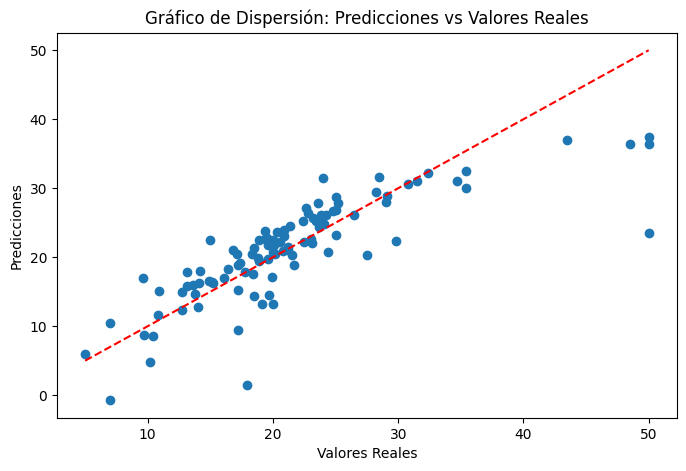

Test RMSE: 4.9787


In [303]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import cross_val_score
import numpy as np
import matplotlib.pyplot as plt

# 1. Definir el modelo Lasso con alpha = 1
lassoR = Lasso(alpha=1)

# 2. Realizar validación cruzada
# cross_val_score devolverá las puntuaciones del modelo en cada fold
# Aquí estamos usando el RMSE, por lo que invertimos los valores de la puntuación para obtener el error.
scores = cross_val_score(lassoR, X_train_selected, y_train, cv=5, scoring='neg_mean_squared_error')

# Convertir MSE a RMSE
rmse_scores = np.sqrt(-scores)

# Imprimir el RMSE para cada fold y el promedio
print("RMSE por Fold: ", rmse_scores)
print("RMSE Promedio (Validación Cruzada): %0.4f" % rmse_scores.mean())

# 3. Entrenar el modelo con el conjunto completo de entrenamiento para visualizar los resultados
lassoR.fit(X_train_selected, y_train)

# Predicciones en el conjunto de prueba
predictions = lassoR.predict(X_test)

# Visualización: Gráfico de dispersión Predicciones vs Valores Reales
plt.figure(figsize=(8, 5))
plt.scatter(y_test, predictions)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.title('Gráfico de Dispersión: Predicciones vs Valores Reales')
plt.show()

# Calcular y mostrar el RMSE en el conjunto de prueba
test_mse = np.mean((predictions - y_test) ** 2)
test_rmse = np.sqrt(test_mse)
print("Test RMSE: %0.4f" % test_rmse)

#10. Expresa tus conclusiones, en concreto ¿con qué modelo te quedarías?¿por qué?
### Conclusión
### En este caso, hemos entrenado un modelo de regresión lineal y dos modelos de regresión regularizada (Ridge y Lasso) para predecir los precios de las viviendas en Boston.
### Hemos realizado un análisis exploratorio de los datos, seleccionado las características más relevantes y no hemos aplicado ningun tipo de transformación logaritmica ni min max scaler ni estandarización porque los resultados eran peores
### Hemos entrenado los modelos y evaluado su rendimiento en el conjunto de prueba. Los resultados obtenidos son los siguientes:
### Modelo de Regresión Lineal:
### Train RMSE: 4.97
### Test RMSE: 5.03
### Modelo de Regresión Ridge:
### Train RMSE: 4.97
### Test RMSE: 25.22
### Modelo de Regresión Lasso:
### Train RMSE: 5.3158
### Test RMSE: 4.9787
### Los tres modelos han obtenido resultados muy similares en términos de RMSE tanto en el conjunto de entrenamiento como en el de prueba. Aunque en el modelo de Ridge empeoraba considerablemete. Esto sugiere que nos quedariamos con el modelo de regresión lineal con el método de Lasso.

